# Tarea 9 - Minería de Grafos

## Sofía Maldonado García

In [ ]:
# Importar librerías necesarias. Geopandas para trabajar con datos geográficos, Pandas para la información exportada de Neo4J y Matplotlib para la visualización.

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carga el archivo geojson como un dataframe de geopandas y los datos de Neo4J como un dataframe normal de Python
gdf = gpd.read_file('Data\germany-states.geojson')
df = pd.read_csv('Data\export.csv')
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((9.65046 49.77634, 9.63747 49.6..."
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((10.13386 50.55, 10.20432 50.5538, 10..."
2,86,DEU,Germany,3,Berlin,None,None,Land,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252..."
3,86,DEU,Germany,4,Brandenburg,None,None,Land,State,"POLYGON ((13.87951 53.50107, 13.91737 53.42054..."
4,86,DEU,Germany,5,Bremen,None,None,Land,State,"POLYGON ((8.98545 53.12822, 8.94874 53.1238, 8..."
5,86,DEU,Germany,6,Hamburg,None,None,Land,State,"POLYGON ((10.07162 53.71823, 10.19855 53.74079..."
6,86,DEU,Germany,7,Hessen,None,Hesse,Land,State,"POLYGON ((9.49877 51.63152, 9.62798 51.63734, ..."
7,86,DEU,Germany,8,Mecklenburg-Vorpommern,None,Mecklenburg-West Pomerania,Land,State,"MULTIPOLYGON (((12.51972 54.48431, 12.65528 54..."
8,86,DEU,Germany,9,Lower Saxony,None,Lower Saxony,Land,State,"MULTIPOLYGON (((8.68083 53.89208, 8.75695 53.8..."
9,86,DEU,Germany,10,North Rhine-Westphalia,None,North Rhine-Westphalia,Land,State,"POLYGON ((8.66628 52.52528, 8.70401 52.5036, 8..."


In [ ]:
# Hace un merge de los datos, usando el nombre de los estados como llave
gdf = gdf.merge(df, left_on='NAME_1', right_on='State')
gdf

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry,State,k1color
0,86,DEU,Germany,1,Baden-Württemberg,None,None,Land,State,"MULTIPOLYGON (((9.65046 49.77634, 9.63747 49.6...",Baden-Württemberg,2
1,86,DEU,Germany,2,Bayern,None,Bavaria,Land,State,"POLYGON ((10.13386 50.55, 10.20432 50.5538, 10...",Bayern,3
2,86,DEU,Germany,3,Berlin,None,None,Land,State,"POLYGON ((13.16181 52.59442, 13.21621 52.58252...",Berlin,1
3,86,DEU,Germany,4,Brandenburg,None,None,Land,State,"POLYGON ((13.87951 53.50107, 13.91737 53.42054...",Brandenburg,2
4,86,DEU,Germany,5,Bremen,None,None,Land,State,"POLYGON ((8.98545 53.12822, 8.94874 53.1238, 8...",Bremen,1
5,86,DEU,Germany,6,Hamburg,None,None,Land,State,"POLYGON ((10.07162 53.71823, 10.19855 53.74079...",Hamburg,1
6,86,DEU,Germany,7,Hessen,None,Hesse,Land,State,"POLYGON ((9.49877 51.63152, 9.62798 51.63734, ...",Hessen,1
7,86,DEU,Germany,8,Mecklenburg-Vorpommern,None,Mecklenburg-West Pomerania,Land,State,"MULTIPOLYGON (((12.51972 54.48431, 12.65528 54...",Mecklenburg-Vorpommern,1
8,86,DEU,Germany,9,Lower Saxony,None,Lower Saxony,Land,State,"MULTIPOLYGON (((8.68083 53.89208, 8.75695 53.8...",Lower Saxony,3
9,86,DEU,Germany,10,North Rhine-Westphalia,None,North Rhine-Westphalia,Land,State,"POLYGON ((8.66628 52.52528, 8.70401 52.5036, 8...",North Rhine-Westphalia,2


<function matplotlib.pyplot.show(close=None, block=None)>

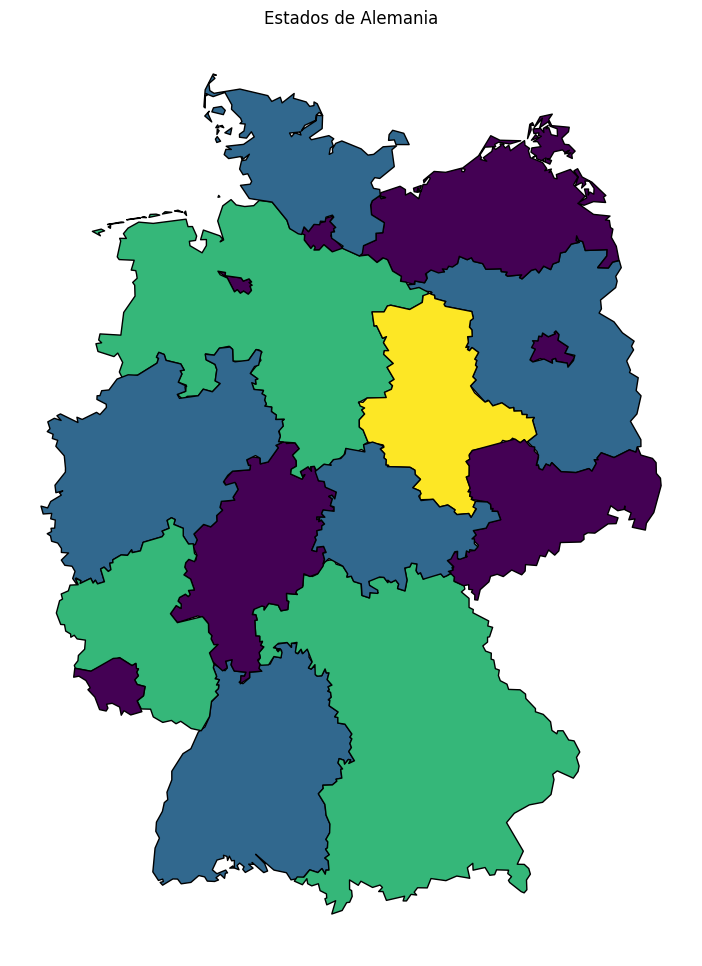

In [6]:
# Visualización del mapa con los colores k1
gdf.plot(column='k1color',edgecolor='black', figsize=(18,12))
plt.title('Estados de Alemania')
plt.axis('off')
plt.show